In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


In [2]:
df= pd.read_csv('Data_Train.csv')
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
df.shape


(10683, 11)

In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Features

- Airline: The name of the airline company.
- Date_of_Journey: The date of the journey they have flew
- Source: Source City
- Destination : Destination of the flight
- Route: Route of the flight including the stopovers
- Dep_Time : Departure Time of the flight from the source
- Arrival_Time: Arrival Time of the flight at the Destination
- Duration: Duration of the flight
- Total_Stops : Total Stops in between (layovers)
- Price : Price of the ticket

In [6]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.dropna(inplace=True)


In [8]:
df.duplicated().sum()

220

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
airline_price = df.groupby('Airline')['Price'].describe(percentiles = [0.25,.5,.75,0.95,.99])



In [11]:
jet_airlines =df[df['Airline'] =='Jet Airways']
jet_airlines[jet_airlines['Price']>27000]






,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
628,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,05:05 13 Mar,6h 10m,1 stop,No info,27210
946,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,19:10,13h 25m,1 stop,No info,27992
1478,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
1654,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,20:20,12h 20m,1 stop,No info,27992
2099,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,19:10,5h 5m,1 stop,No info,36235
2108,Jet Airways,15/03/2019,Banglore,New Delhi,BLR → BOM → DEL,21:25,05:05 13 Mar,7h 40m,1 stop,No info,27210
2618,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
2693,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 02 Mar,6h 5m,1 stop,No info,35185
3032,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BDQ → DEL,05:50,12:20,6h 30m,1 stop,Business class,28097
3111,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,11:40,21:20,9h 40m,1 stop,1 Long layover,27992


In [12]:
df[['Price']].describe().T



,count,mean,std,min,25%,50%,75%,max
Price,10462.0,9026.790289,4624.849541,1759.0,5224.0,8266.0,12344.75,79512.0


Text(0.5, 0, 'Price')

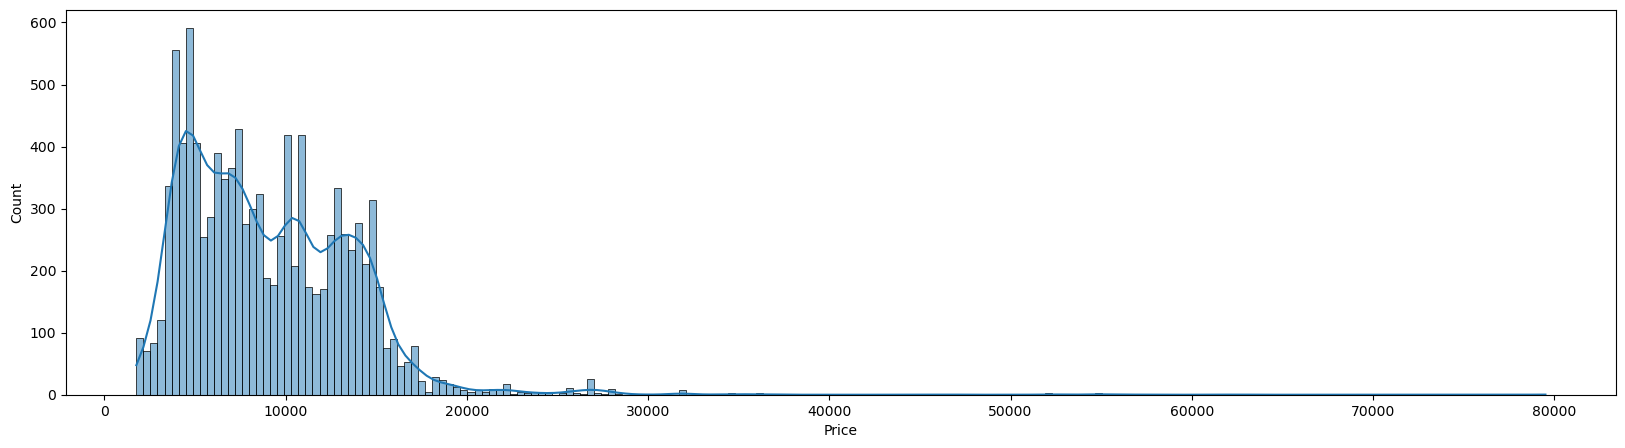

In [13]:
plt.figure(figsize=(20,5))
sns.histplot(x=df['Price'], bins=200,data=df,kde=True)
plt.xlabel('Price')



Text(0.5, 0, 'Price')

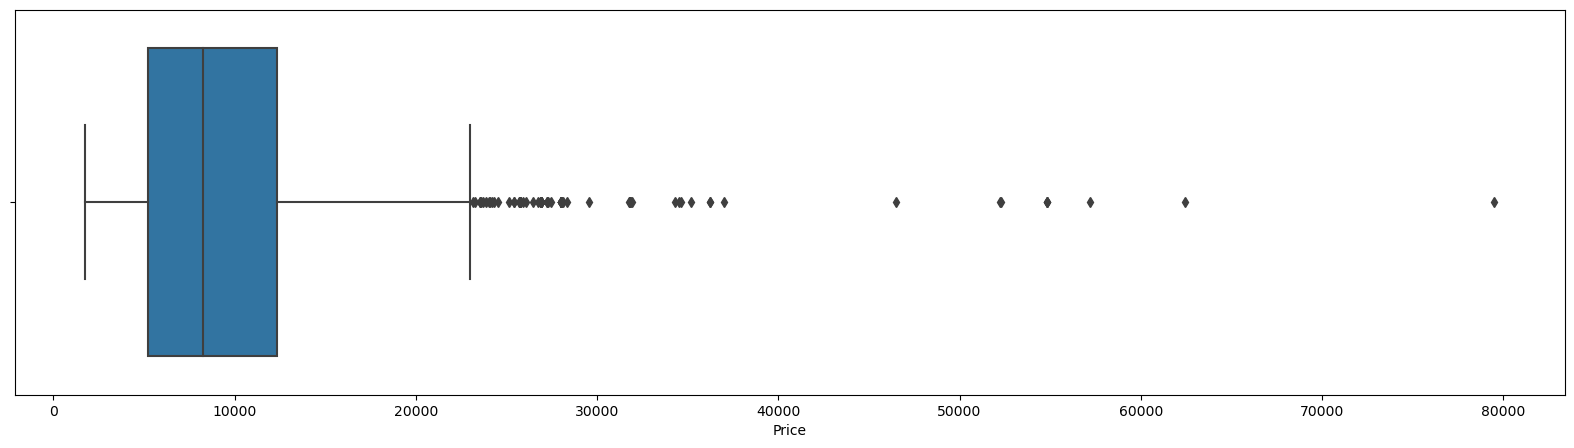

In [14]:
plt.figure(figsize=(20,5))
sns.boxplot(x=df['Price'],data=df)
plt.xlabel('Price')

### Airline  

In [15]:
df['Airline'].value_counts()


Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

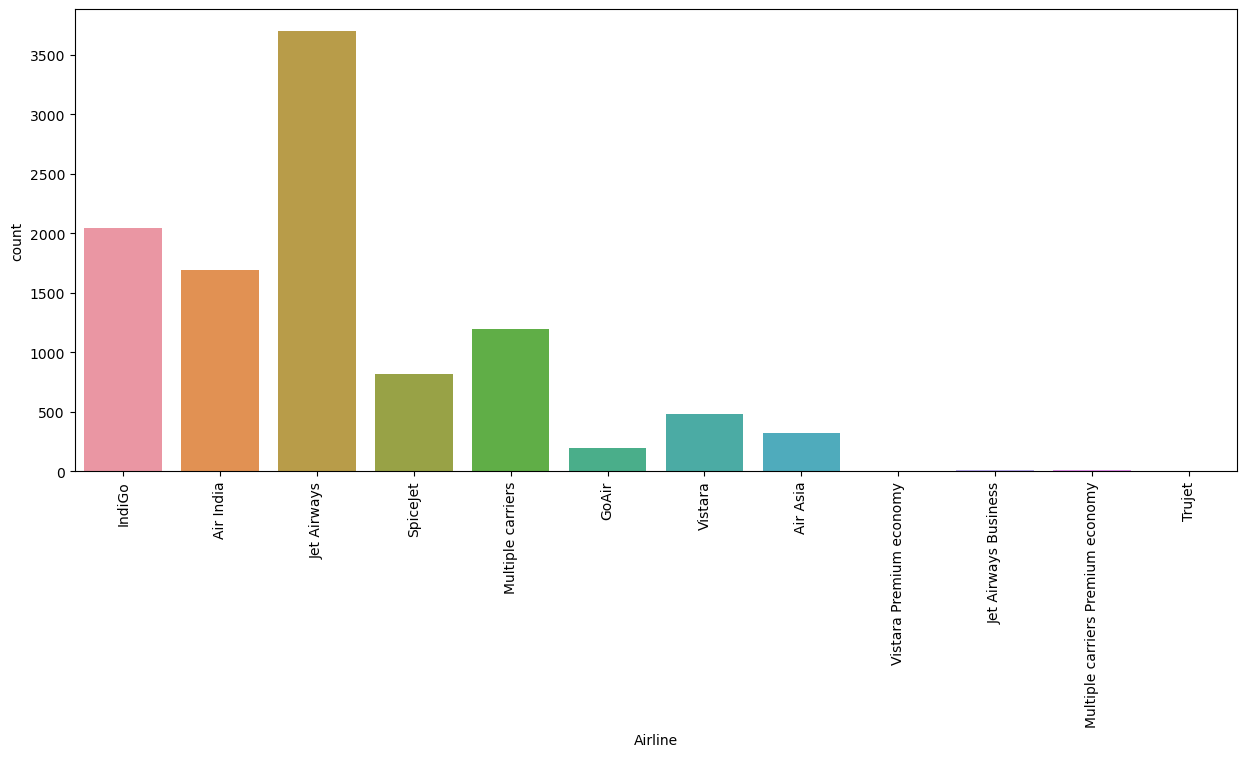

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x='Airline',data=df)
plt.xticks(rotation=90)


- Here Clearly Jet Airways have the most frequent number of flights in comparison to others.
- Vistara Premium economy,Jet Airways Business, Trujet,Multiple carriers Premium economy, have very negligible amount of flights

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

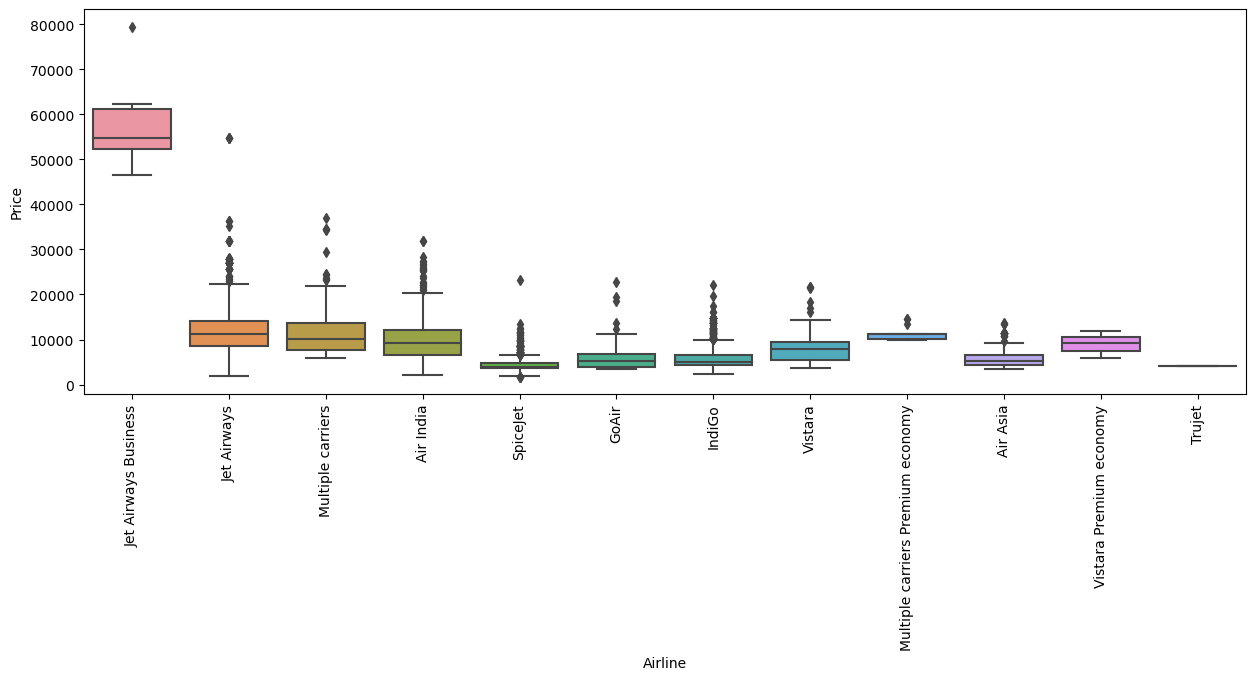

In [17]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)

Inferences
- Indigo, Spicejet, GoAir,Air Asia, Truejet have lower prices.
- Jet Airways,Multiple carriers,Vistara Premuium economy have comparatively prices at the higher end.
- Jet Airways Business have abnormally very high prices among them all.

In [18]:
def other_cat(str):
    if str=='Vistara' or str=='Air Asia'or str=='GoAir' or str=='Multiple carriers Premium economy'or str=='Jet Airways Business'or str=='Vistara Premium economy' or str=='Trujet':
        str='others'
    return str 

In [19]:
df['Airline']=df['Airline'].apply(other_cat)



In [20]:
routes = df.groupby('Route').count()

In [21]:
top_routes= routes[routes['Airline']>400].sort_values(by='Airline',ascending=False)

In [22]:
#getting the top_routes and getting the list
top_routes_index = top_routes.index
df_routes = df.copy()
df_routes.set_index('Route',inplace=True)
#Getting the mean prices of the top_routes
mean_price=[]
for i in top_routes_index:
    mean_price.append(df_routes.loc[i]['Price'].mean())

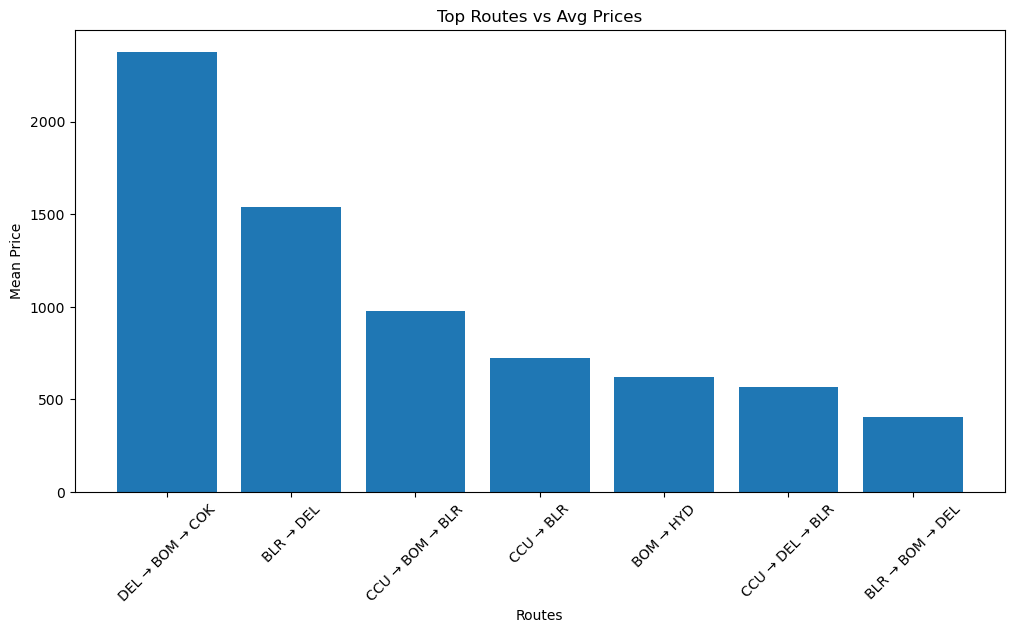

In [23]:
## Plotting the price between the top routes and average prices
plt.figure(figsize=(12,6))
plt.bar(top_routes.index,top_routes['Price'])
plt.xlabel('Routes')
plt.xticks(rotation=45)
plt.ylabel('Mean Price')
plt.title('Top Routes vs Avg Prices')
plt.show()

Inferences
- BLR->BOM-> DEL has the lowest mean price among the top Routes.
- DEL-->BOM->COK has the highest mean price among the top Routes

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [25]:
### get dummies variable
## Airline
airline = pd.get_dummies(df['Airline'],drop_first=True,prefix='Airline')
source = pd.get_dummies(df['Source'],drop_first=True,prefix='Source')
destination = pd.get_dummies(df['Destination'],drop_first=True,prefix='Destination')



def split(x):
    return x.split()[0::2]

df['Route'] = df['Route'].apply(split)

# Splitting routes into separate columns
df[['Route1', 'Route2', 'Route3', 'Route4','Route5','Route6']] = df['Route'].apply(lambda x: pd.Series(x))


## Dropping the original columns
cols_todrop= ['Airline','Route','Source','Destination']
df.drop(cols_todrop,axis=1,inplace=True)

In [26]:
df.head(4)

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,Route6
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,BLR,DEL,NaN,NaN,NaN,NaN
1,1/05/2019,05:50,13:15,7h 25m,2 stops,No info,7662,CCU,IXR,BBI,BLR,NaN,NaN
2,9/06/2019,09:25,04:25 10 Jun,19h,2 stops,No info,13882,DEL,LKO,BOM,COK,NaN,NaN
3,12/05/2019,18:05,23:30,5h 25m,1 stop,No info,6218,CCU,NAG,BLR,NaN,NaN,NaN


In [27]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [28]:
### Encoding the columns now
### Total_Stops
df.loc[:,'Total_Stops'] = df.loc[:,'Total_Stops'].replace({
    '1 stop':1,
    'non-stop':0,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})
df['Total_Stops'] = df['Total_Stops'].apply(lambda x: int(x))
    
### LabelEncoding
le = LabelEncoder()
df.loc[:,'Route1'] = le.fit_transform(df['Route1'])
df.loc[:,'Route2'] = le.fit_transform(df['Route2'])
df.loc[:,'Route3'] = le.fit_transform(df['Route3'])
df.loc[:,'Route4'] = le.fit_transform(df['Route4'])
df.loc[:,'Route5'] = le.fit_transform(df['Route5'])
df.loc[:,'Route6'] = le.fit_transform(df['Route6'])
df.loc[:,'Additional_Info']  =le.fit_transform(df['Additional_Info'])

In [29]:
## Combining  the dummies
combined = pd.concat([airline,source,destination],axis=1)
cols = combined.columns

### Mapping the boolean values to 1 and 0
for i in cols:
    combined[i] = combined[i].map({True:1,False:0})

    
## Concatenating to the main column
df= pd.concat([df,combined],axis=1)
df.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,...,Airline_others,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,22:20,01:10 22 Mar,2h 50m,0,8,3897,0,10,26,...,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,05:50,13:15,7h 25m,2,8,7662,2,20,1,...,0,0,0,1,0,0,0,0,0,0
2,9/06/2019,09:25,04:25 10 Jun,19h,2,8,13882,3,27,4,...,0,0,1,0,0,1,0,0,0,0
3,12/05/2019,18:05,23:30,5h 25m,1,8,6218,2,29,3,...,0,0,0,1,0,0,0,0,0,0
4,01/03/2019,16:50,21:35,4h 45m,1,8,13302,0,29,7,...,0,0,0,0,0,0,0,0,0,1


### Date_of_Journey

In [30]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


C:\Users\91810\AppData\Local\Temp\ipykernel_26328\2063426282.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])


In [31]:
#extracting the month and day from the Date of Journey column

df['day_of_journey']=df['Date_of_Journey'].dt.day
df['month_of_journey']=df['Date_of_Journey'].dt.month

In [32]:
df.drop('Date_of_Journey',axis=1,inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Dep_Time                   10462 non-null  object
 1   Arrival_Time               10462 non-null  object
 2   Duration                   10462 non-null  object
 3   Total_Stops                10462 non-null  int64 
 4   Additional_Info            10462 non-null  object
 5   Price                      10462 non-null  int64 
 6   Route1                     10462 non-null  object
 7   Route2                     10462 non-null  object
 8   Route3                     10462 non-null  object
 9   Route4                     10462 non-null  object
 10  Route5                     10462 non-null  object
 11  Route6                     10462 non-null  object
 12  Airline_IndiGo             10462 non-null  int64 
 13  Airline_Jet Airways        10462 non-null  int64 
 14  Airline_Mul

In [34]:
#Source

In [35]:
#Destination

In [36]:
#Route

In [37]:
#Dep_Time

In [38]:
##converting Dep_Time and Arrival_Time to datetime format

df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

C:\Users\91810\AppData\Local\Temp\ipykernel_26328\559233080.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
C:\Users\91810\AppData\Local\Temp\ipykernel_26328\559233080.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])


In [39]:
##converting Dep_Time and Arrival_Time to datetime format

df['Dep_Time']=pd.to_datetime(df['Dep_Time'])
df['Arrival_Time']=pd.to_datetime(df['Arrival_Time'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Dep_Time                   10462 non-null  datetime64[ns]
 1   Arrival_Time               10462 non-null  datetime64[ns]
 2   Duration                   10462 non-null  object        
 3   Total_Stops                10462 non-null  int64         
 4   Additional_Info            10462 non-null  object        
 5   Price                      10462 non-null  int64         
 6   Route1                     10462 non-null  object        
 7   Route2                     10462 non-null  object        
 8   Route3                     10462 non-null  object        
 9   Route4                     10462 non-null  object        
 10  Route5                     10462 non-null  object        
 11  Route6                     10462 non-null  object        
 12  Airline_I

In [41]:
#extracting hours and minutes from the departure and arrival times
df['Dep_time_hr']=df['Dep_Time'].dt.hour
df['Dep_time_minute']=df['Dep_Time'].dt.minute
df['Arr_time_hr']=df['Arrival_Time'].dt.hour
df['Arr_time_minute']=df['Arrival_Time'].dt.minute

In [42]:
#dropping the dep_time and arrival_time columns
df.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [43]:
df['Dep_time_hr']=df['Dep_time_hr'].astype(int)



In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Duration                   10462 non-null  object
 1   Total_Stops                10462 non-null  int64 
 2   Additional_Info            10462 non-null  object
 3   Price                      10462 non-null  int64 
 4   Route1                     10462 non-null  object
 5   Route2                     10462 non-null  object
 6   Route3                     10462 non-null  object
 7   Route4                     10462 non-null  object
 8   Route5                     10462 non-null  object
 9   Route6                     10462 non-null  object
 10  Airline_IndiGo             10462 non-null  int64 
 11  Airline_Jet Airways        10462 non-null  int64 
 12  Airline_Multiple carriers  10462 non-null  int64 
 13  Airline_SpiceJet           10462 non-null  int64 
 14  Airline_oth

In [45]:
#Duration

In [46]:
df['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [47]:
def duration_preprocess(value):
    lst=value.split()
    if len(lst)==2:     # if both the hours and minutes are present return it
        return value
    else:
        if 'h' in value:  # if only hour is present append 0m
            return value+' 0m'
        else:             # if only minute is present add 0h in the front
            return '0h '+value

In [48]:
df['Duration']=df['Duration'].apply(duration_preprocess)


In [49]:
def convert_to_minutes(time_str):
    # Split the time string into hours and minutes parts
    hours, minutes = time_str.split('h')
    
    # Convert hours and minutes to integers
    hours = int(hours)
    minutes = int(minutes[:-1])  # Removing 'm' character and converting to integer
    
    # Convert hours to minutes and add to minutes
    total_minutes = (hours * 60) + minutes
    
    return total_minutes




In [50]:
df['Duration_in_min']=df['Duration'].apply(convert_to_minutes)


In [51]:
#duration v/s price

Text(0.5, 0, 'Duration_in_min')

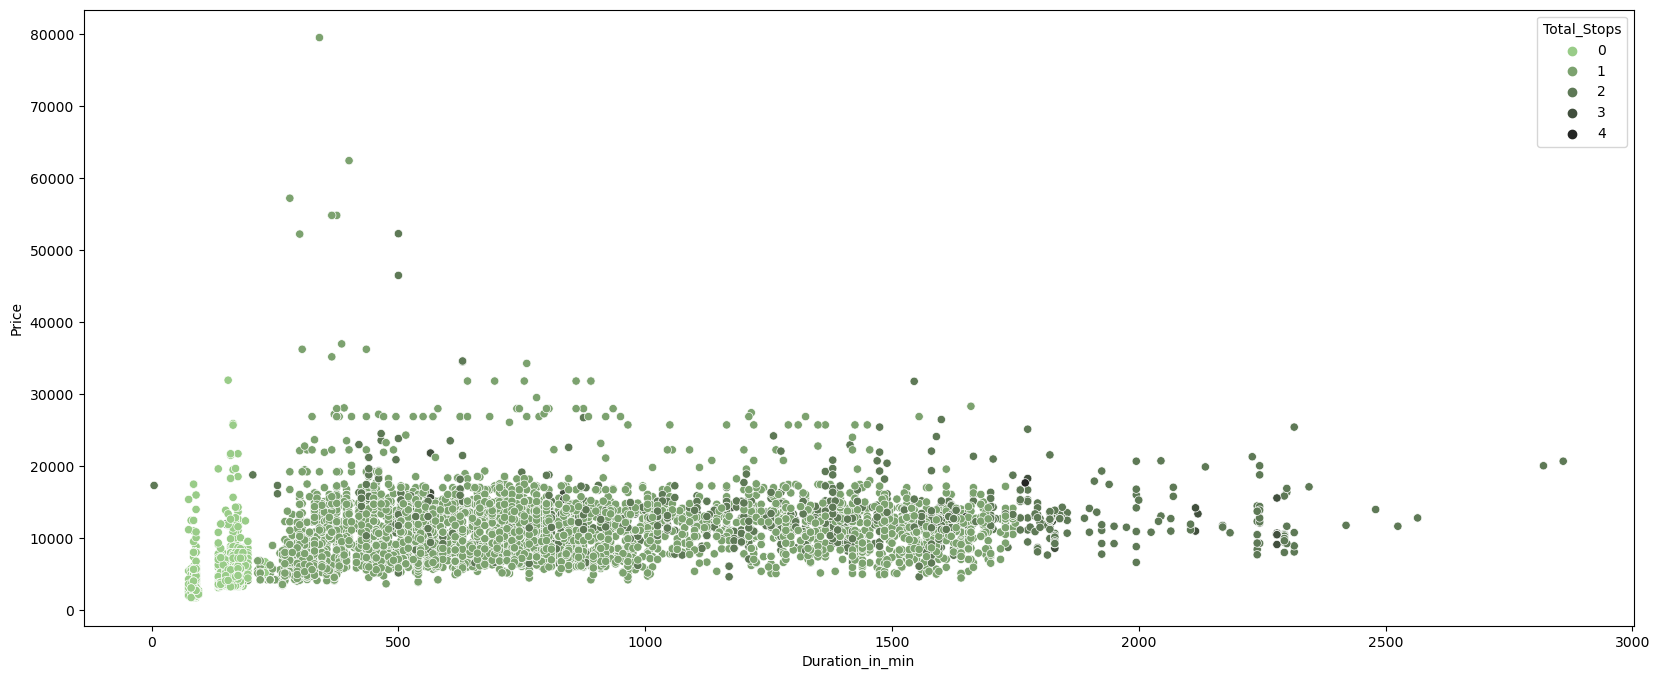

In [52]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['Duration_in_min'],y=df['Price'],data=df,hue=df['Total_Stops'],palette='dark:#9C8_r',)
plt.xlabel("Duration_in_min")

In [53]:
df.head(3)

,Duration,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,Route6,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,Duration_in_min
0,2h 50m,0,8,3897,0,10,26,11,5,1,...,0,0,1,24,3,22,20,1,10,170
1,7h 25m,2,8,7662,2,20,1,3,5,1,...,0,0,0,1,5,5,50,13,15,445
2,19h 0m,2,8,13882,3,27,4,5,5,1,...,0,0,0,9,6,9,25,4,25,1140


In [54]:
df.drop('Duration',axis=1,inplace=True)


In [55]:
df.head(3)

,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,Route6,Airline_IndiGo,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,Duration_in_min
0,0,8,3897,0,10,26,11,5,1,1,...,0,0,1,24,3,22,20,1,10,170
1,2,8,7662,2,20,1,3,5,1,0,...,0,0,0,1,5,5,50,13,15,445
2,2,8,13882,3,27,4,5,5,1,0,...,0,0,0,9,6,9,25,4,25,1140


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Total_Stops                10462 non-null  int64 
 1   Additional_Info            10462 non-null  object
 2   Price                      10462 non-null  int64 
 3   Route1                     10462 non-null  object
 4   Route2                     10462 non-null  object
 5   Route3                     10462 non-null  object
 6   Route4                     10462 non-null  object
 7   Route5                     10462 non-null  object
 8   Route6                     10462 non-null  object
 9   Airline_IndiGo             10462 non-null  int64 
 10  Airline_Jet Airways        10462 non-null  int64 
 11  Airline_Multiple carriers  10462 non-null  int64 
 12  Airline_SpiceJet           10462 non-null  int64 
 13  Airline_others             10462 non-null  int64 
 14  Source_Chen

In [57]:
scaler =MinMaxScaler()
cols = df.columns
df = pd.DataFrame(scaler.fit_transform(df),columns = cols)
df.head()

,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,Route6,Airline_IndiGo,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,Duration_in_min
0,0.00,0.888889,0.027497,0.00,0.256410,1.000000,1.000000,1.0,1.0,1.0,...,0.0,0.0,1.0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.057793
1,0.50,0.888889,0.075920,0.50,0.512821,0.038462,0.272727,1.0,1.0,0.0,...,0.0,0.0,0.0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.154116
2,0.50,0.888889,0.155917,0.75,0.692308,0.153846,0.454545,1.0,1.0,0.0,...,0.0,0.0,0.0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.397548
3,0.25,0.888889,0.057348,0.50,0.743590,0.115385,1.000000,1.0,1.0,1.0,...,0.0,0.0,0.0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.112084
4,0.25,0.888889,0.148457,0.00,0.743590,0.269231,1.000000,1.0,1.0,1.0,...,0.0,0.0,1.0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.098074


In [58]:
X = df.drop('Price',axis=1)
y = df.Price

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

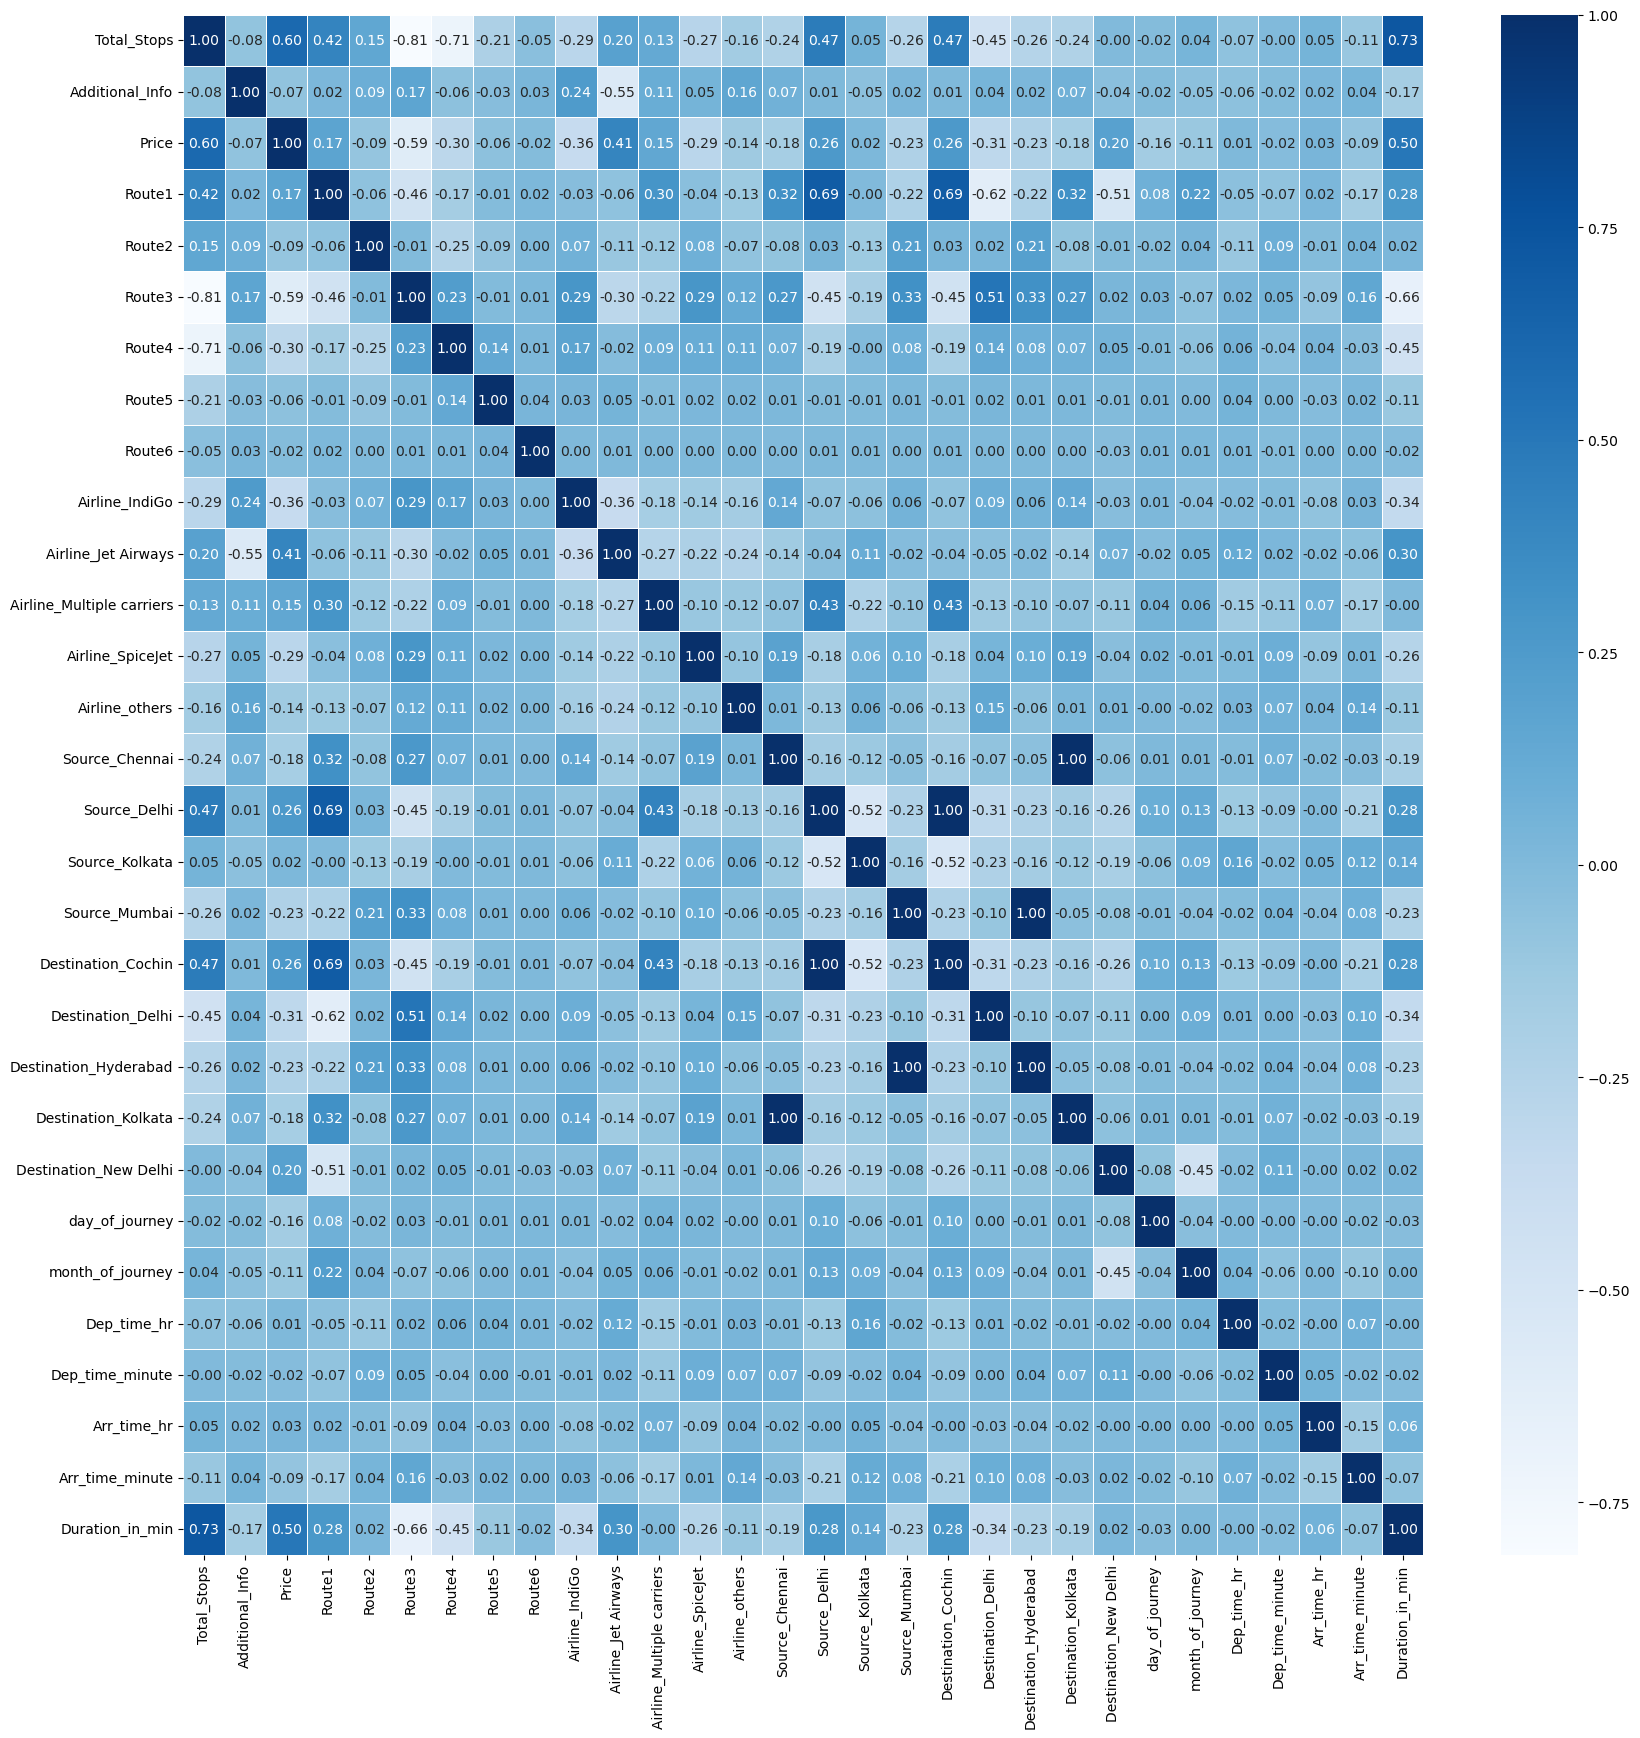

In [59]:
corr = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, cmap='Blues')
plt.show()

In [60]:
corr = df.corr()
corr 

,Total_Stops,Additional_Info,Price,Route1,Route2,Route3,Route4,Route5,Route6,Airline_IndiGo,...,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,Duration_in_min
Total_Stops,1.000000,-0.079284,0.602013,0.417153,0.152266,-0.811732,-0.706919,-0.211415,-0.047329,-0.294993,...,-0.260668,-0.236125,-0.000170,-0.018937,0.039003,-0.067523,-0.002695,0.051476,-0.107099,0.727982
Additional_Info,-0.079284,1.000000,-0.068779,0.020189,0.089303,0.166486,-0.055844,-0.030352,0.027400,0.244108,...,0.021080,0.071547,-0.042841,-0.016443,-0.049186,-0.059406,-0.015916,0.021293,0.044321,-0.169939
Price,0.602013,-0.068779,1.000000,0.173508,-0.090767,-0.593982,-0.300467,-0.057602,-0.018307,-0.357725,...,-0.229179,-0.178107,0.199411,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163,0.501758
Route1,0.417153,0.020189,0.173508,1.000000,-0.064639,-0.455976,-0.174200,-0.013077,0.016220,-0.031752,...,-0.222154,0.320908,-0.513270,0.077105,0.224097,-0.047462,-0.074881,0.021514,-0.172785,0.276246
Route2,0.152266,0.089303,-0.090767,-0.064639,1.000000,-0.005609,-0.247700,-0.086689,0.003960,0.072250,...,0.213094,-0.078746,-0.012875,-0.017594,0.035141,-0.105575,0.087405,-0.013616,0.041927,0.021019
Route3,-0.811732,0.166486,-0.593982,-0.455976,-0.005609,1.000000,0.229756,-0.008532,0.011020,0.285601,...,0.326181,0.268646,0.024897,0.029647,-0.068522,0.017666,0.045933,-0.089866,0.157417,-0.659556
Route4,-0.706919,-0.055844,-0.300467,-0.174200,-0.247700,0.229756,1.000000,0.142402,0.009884,0.174413,...,0.082962,0.073950,0.054267,-0.006813,-0.056472,0.057279,-0.044697,0.036386,-0.030227,-0.450748
Route5,-0.211415,-0.030352,-0.057602,-0.013077,-0.086689,-0.008532,0.142402,1.000000,0.036855,0.031222,...,0.011056,0.012322,-0.008934,0.010131,0.000428,0.044766,0.004129,-0.025114,0.018165,-0.111950
Route6,-0.047329,0.027400,-0.018307,0.016220,0.003960,0.011020,0.009884,0.036855,1.000000,0.004816,...,0.002612,0.001901,-0.031601,0.014392,0.014295,0.012767,-0.013301,0.003405,0.002785,-0.022266
Airline_IndiGo,-0.294993,0.244108,-0.357725,-0.031752,0.072250,0.285601,0.174413,0.031222,0.004816,1.000000,...,0.057911,0.141073,-0.026885,0.009730,-0.042712,-0.022254,-0.014346,-0.075624,0.034447,-0.338287


### High correlation
- Total_Stops- Duration
- Total_Stops- Route3 and Route4
- Source_Delhi- Route1
- Destination_Cochin- Route1
- Destination_Delhi- Route1
- Destination_Cochin - Source_Delhi
- Destination_Kolkata- Source_Chennai
- Destination_Hyderabad- Source_Mumbai

In [61]:
import pandas as pd

# Assuming you have your correlation matrix stored in a DataFrame called 'correlation_matrix'
# Replace 'correlation_matrix' with your actual DataFrame name

# Example correlation matrix initialization
correlation_matrix = pd.DataFrame(corr)  # Replace ... with your actual correlation matrix

# Find correlations greater than 0.60
high_correlationsp = correlation_matrix[(correlation_matrix > 0.60) & (correlation_matrix < 1.0)].stack()
high_correlationsn = correlation_matrix[(correlation_matrix < -0.60) & (correlation_matrix > -1.0)].stack()

# Filter out correlations greater than 0.60
high_correlationsp = high_correlationsp.reset_index()
high_correlationsn = high_correlationsn.reset_index()
high_correlationsp.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_correlationsn.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Print the correlations greater than 0.60
print(high_correlationsp)


            Feature 1           Feature 2  Correlation
0         Total_Stops               Price     0.602013
1         Total_Stops     Duration_in_min     0.727982
2               Price         Total_Stops     0.602013
3              Route1        Source_Delhi     0.693877
4              Route1  Destination_Cochin     0.693877
5        Source_Delhi              Route1     0.693877
6  Destination_Cochin              Route1     0.693877
7     Duration_in_min         Total_Stops     0.727982


In [62]:
print(high_correlationsn)

           Feature 1          Feature 2  Correlation
0        Total_Stops             Route3    -0.811732
1        Total_Stops             Route4    -0.706919
2             Route1  Destination_Delhi    -0.615249
3             Route3        Total_Stops    -0.811732
4             Route3    Duration_in_min    -0.659556
5             Route4        Total_Stops    -0.706919
6  Destination_Delhi             Route1    -0.615249
7    Duration_in_min             Route3    -0.659556


In [63]:
#### Checking the important features now
from sklearn.feature_selection import mutual_info_regression
imp = pd.DataFrame()
imp['Features'] = X_train.columns
imp['Importance'] = mutual_info_regression(X_train,y_train)
imp = imp.sort_values(by='Importance',ascending=False)
imp.reset_index(drop=True,inplace=True)

In [64]:
imp


,Features,Importance
0,Duration_in_min,1.552490
1,Route2,1.406399
2,Route3,1.115831
3,Arr_time_hr,1.042979
4,Route1,1.042176
5,Arr_time_minute,0.845726
6,Dep_time_hr,0.808507
7,Total_Stops,0.738443
8,Dep_time_minute,0.666256
9,month_of_journey,0.587682


In [65]:
useful_feature=imp[imp['Importance']<.40]
print(useful_feature['Features'])


15               Airline_IndiGo
16            Destination_Delhi
17               day_of_journey
18                       Route4
19    Airline_Multiple carriers
20               Airline_others
21                Source_Mumbai
22        Destination_Hyderabad
23             Airline_SpiceJet
24        Destination_New Delhi
25               Source_Chennai
26          Destination_Kolkata
27                       Route5
28                       Route6
Name: Features, dtype: object


In [68]:
## Dropping the columns having least dependency with output variable
X_train_after_feature_selection = X_train.drop(['Airline_IndiGo','Destination_Delhi','day_of_journey','Route4','Airline_Multiple carriers',
                              'Airline_others','Source_Mumbai','Destination_Hyderabad','Airline_SpiceJet','Destination_New Delhi',
                              'Source_Chennai','Destination_Kolkata','Route5','Route6'],axis=1)
    

In [78]:
X_train_after_feature_selection.head()

,Total_Stops,Additional_Info,Route1,Route2,Route3,Airline_Jet Airways,Source_Delhi,Source_Kolkata,Destination_Cochin,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,Duration_in_min
10389,0.25,0.888889,0.50,0.153846,0.115385,1.0,0.0,1.0,0.0,0.666667,0.347826,0.454545,0.826087,0.909091,0.238179
1055,0.00,0.555556,0.00,0.256410,1.000000,1.0,0.0,0.0,0.0,0.666667,0.347826,0.363636,0.478261,0.363636,0.061296
5344,0.25,0.555556,0.50,0.153846,0.115385,1.0,0.0,1.0,0.0,0.666667,0.347826,0.454545,0.782609,0.272727,0.204904
9961,0.25,0.888889,0.75,0.153846,0.230769,0.0,1.0,0.0,1.0,0.666667,0.434783,0.636364,0.043478,0.545455,0.311734
4280,0.25,0.888889,0.75,0.153846,0.230769,0.0,1.0,0.0,1.0,0.666667,0.434783,0.000000,0.826087,0.000000,0.187391


In [74]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(X_train.columns))
pca.fit(X_train)

PCA(n_components=29)

In [75]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.2574453 , 0.39284881, 0.47911904, 0.5471014 , 0.60374325,
       0.65555405, 0.70043334, 0.74170103, 0.7812323 , 0.81806182,
       0.84934196, 0.87571467, 0.90097648, 0.92486213, 0.94639152,
       0.96478001, 0.9773503 , 0.9845779 , 0.99037976, 0.99498662,
       0.99881761, 0.99979377, 0.99995328, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])

In [113]:
pca = PCA(n_components=15)
X_train_pca = pd.DataFrame(pca.fit_transform(X_train))
X_train_pca.columns = ['PCA_'+str(i) for i in range(X_train_pca.shape[1])]
X_test_pca = pd.DataFrame(pca.transform(X_test))
X_test_pca.columns = ['PCA_'+str(i) for i in range(X_test_pca.shape[1])]

In [114]:
X_train_pca

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14
0,-0.566166,1.070669,-0.208487,-0.039865,-0.072745,-0.035573,0.123646,-0.249236,-0.205375,0.187509,0.061728,-0.411295,-0.017036,0.282317,-0.232483
1,-0.812520,-0.001377,0.954015,-0.608695,0.218921,-0.461285,-0.077403,0.111720,0.284502,-0.060121,-0.168260,-0.092379,-0.020684,-0.024194,-0.309841
2,-0.480894,1.063520,-0.146745,-0.094385,-0.096534,0.007122,-0.126032,0.149032,0.372117,-0.405942,-0.025540,0.031409,-0.091553,0.047837,-0.233759
3,0.849723,-0.573369,-0.260254,0.005407,-0.697970,-0.196554,-0.201581,0.231312,-0.389105,0.014010,-0.294955,0.164957,-0.167866,-0.080022,-0.018474
4,1.172236,-0.274199,-0.233422,0.013517,0.422264,-0.024697,0.456186,-0.256216,0.584724,-0.159070,-0.062837,-0.022476,-0.184216,-0.013102,0.019570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7318,-0.851261,-0.059502,1.004780,-0.391663,0.156416,-0.569038,0.248368,0.695000,0.287141,-0.057231,-0.134451,-0.213829,0.019889,0.183079,-0.413254
7319,-0.591862,-0.669925,-0.163804,0.257898,0.087523,0.760158,-0.478658,0.731357,0.882634,1.006905,0.281667,-0.055802,0.176410,0.375661,-0.265268
7320,0.946528,-0.233148,-0.072343,0.024916,0.137294,0.077131,0.036017,-0.195661,-0.217987,0.040955,0.081070,0.276956,0.806217,0.173261,-0.377153
7321,-0.562350,-0.877132,-0.472511,-0.243761,-0.733961,0.140810,-0.218141,-0.115525,0.307566,1.097387,0.438632,0.093664,-0.375568,0.659888,-0.411774


In [115]:
X_train_pca.head()

,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14
0,-0.566166,1.070669,-0.208487,-0.039865,-0.072745,-0.035573,0.123646,-0.249236,-0.205375,0.187509,0.061728,-0.411295,-0.017036,0.282317,-0.232483
1,-0.812520,-0.001377,0.954015,-0.608695,0.218921,-0.461285,-0.077403,0.111720,0.284502,-0.060121,-0.168260,-0.092379,-0.020684,-0.024194,-0.309841
2,-0.480894,1.063520,-0.146745,-0.094385,-0.096534,0.007122,-0.126032,0.149032,0.372117,-0.405942,-0.025540,0.031409,-0.091553,0.047837,-0.233759
3,0.849723,-0.573369,-0.260254,0.005407,-0.697970,-0.196554,-0.201581,0.231312,-0.389105,0.014010,-0.294955,0.164957,-0.167866,-0.080022,-0.018474
4,1.172236,-0.274199,-0.233422,0.013517,0.422264,-0.024697,0.456186,-0.256216,0.584724,-0.159070,-0.062837,-0.022476,-0.184216,-0.013102,0.019570


In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor(max_depth=9)
dt.fit(X_train_pca,y_train)
y_train_pred = dt.predict(X_train_pca)
train_score = r2_score(y_train,y_train_pred)
print(train_score)
y_pred = dt.predict(X_test_pca)
r2 = r2_score(y_test,y_pred)
print(r2)


0.7983507563453531
0.6228005522644744


In [117]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=5)
rf.fit(X_train_pca,y_train)
y_train_pred = rf.predict(X_train_pca)
train_score = r2_score(y_train,y_train_pred)
print(train_score)
y_pred = rf.predict(X_test_pca)
r2 = r2_score(y_test,y_pred)
print(r2)


0.6433878379470472
0.5669400569643865


In [118]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train_pca,y_train)
y_train_pred = KNN.predict(X_train_pca)
train_score = r2_score(y_train,y_train_pred)
print(train_score)
y_pred = KNN.predict(X_test_pca)
r2 = r2_score(y_test,y_pred)
print(r2)


0.8153784368300403
0.7109115614443584


In [112]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train_pca,y_train)
y_train_pred = svr.predict(X_train_pca)
train_score = r2_score(y_train,y_train_pred)
print(train_score)
y_pred = svr.predict(X_test_pca)
r2 = r2_score(y_test,y_pred)
print(r2)

0.26193732623999333
0.24801786777285728


In [ ]:
## param grid
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'random_state': [42]  # Random seed for reproducibility
}


grid_search = GridSearchCV(estimator=dt,param_grid=param_grid
                            ,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,y_train)
final_dt_parameter=grid_search.best_params_


In [ ]:
dt_best = grid_search.best_estimator_
dt_best.fit(X_train,y_train)
y_train_pred = dt_best.predict(X_train_pca)
train_score = r2_score(y_train,y_train_pred)
print('Train_score:',train_score)
y_pred = dt_best.predict(X_test_pca)
r2 = r2_score(y_test,y_pred)
print('Test Score:',r2)
res.loc[len(res)] = ['GridSearch DT',train_score,r2]
res